# 1. Important Information

# 2. Loading The Data

Import all of the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Load the data from the '.csv' file into a 'pandas dataframe'.

In [2]:
data = pd.read_csv('RICE.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB
None


Observation Year  Standard Week  Pest Value Collection Type  MaxT  MinT  \
0              2003              1         0.0     Number/hill  27.9  14.8   
1              2003              2         0.0     Number/hill  27.2  15.0   
2              2003              3         0.0     Number/hill  28.7  18.3   
3              2003              4         0.0     Number/hill  25.3  16.4   
4              2003              5         0.0     Number/hill  28.8  18.7   

   RH1(%)  RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME  \
0    94.7    51.3     0.0       3.1       8.7      2.7  Brownplanthopper   
1    93.9    53.1     0.0       2.1       8.7      2.4  Brownplanthopper   
2    94.1    56.7     0.6       4.8       6.7      2.8  Brownplanthopper   
3    90.9    57.4     0.3       6.5       5.3      3.0  Brownplanthopper   
4    95.7    55.0     0.0       5.2       6.3      2.8  Brownplanthopper   

  Location  
0  Cuttack  
1  Cuttack  
2  Cuttack  
3  Cuttack  
4  Cuttack

# 3. Data Exploration

## 3.1 Attribute Analysis

### Understanding Each Feature

- **Observation Year**: The fiscal year that the observation / reading was made.
- **Standard Week**: The week of the year that the observation / reading was made (Ranging from 1 to 52).
- **Pest Value**: The numerical value of the reading that was taken. This is used to create the target attribute.
- **Collection Type**: The process / procedure used to take the reading.
- **MaxT**: The maximum temperature during the respective week.
- **MinT**: The minimum temperature during the respective week.
- **RH1(%)**: The maximum relative humidity during the respective week.
- **RH2(%)**: The minimum relative humidity during the respective week.
- **RF(mm)**: The rainfall (in mm) during the respective week.
- **WS(kmph)**: The wind speed (in kmph) during the respective week.
- **SSH(hrs)**: The average sunshine hours per day during the respective week.
- **EVP(mm)**: The evaporation (in mm) during the respective week.
- **Pest Name**: The recorded pest's name.
- **Location**: The location where the reading was collected / recorded.

### Coverage
- **Temporal Coverage Start Date**: 1960/12/31
- **Temporal Coverage End Date**: 2011/12/31
- **Geospatial Coverage**: India

In [3]:
data.describe()

Observation Year  Standard Week     Pest Value          MaxT  \
count      19404.000000   19404.000000   19404.000000  19404.000000   
mean        2000.024789      26.473717     807.944081     31.169006   
std            9.827306      15.016247    5290.180315      4.904610   
min         1959.000000       1.000000       0.000000     10.900000   
25%         1996.000000      13.000000       0.000000     28.800000   
50%         2001.000000      26.000000       3.000000     30.900000   
75%         2007.000000      39.000000      92.000000     33.425000   
max         2011.000000      52.000000  311169.000000     71.600000   

               MinT        RH1(%)        RH2(%)        RF(mm)      WS(kmph)  \
count  19404.000000  19404.000000  19404.000000  19404.000000  19404.000000   
mean      20.404540     82.190981     53.725763     19.414152      4.501268   
std        5.388381     13.846883     18.948801     39.160009      3.194973   
min        0.800000      9.300000      6.700000      0.000000      0.000000   
25%       17.500000     79.100000     38.000000      0.000000      2.300000   
50%       22.000000     87.300000     56.600000      0.000000      3.700000   
75%       24.400000     91.000000     69.000000     21.400000      5.900000   
max       30.900000    100.000000     95.100000    444.400000     27.600000   

           SSH(hrs)       EVP(mm)  
count  19404.000000  19404.000000  
mean       6.858529      5.877180  
std        4.176542      6.536221  
min        0.000000      0.000000  
25%        4.900000      2.900000  
50%        7.300000      4.000000  
75%        8.900000      6.000000  
max      127.100000     68.300000

### "Collection Type"

This shows that there are 5 different 'Collection Types' used to collect the 'Pest Value'. There are no deviations or inconsistencies with the names, therefore no normalization is needed.

In [4]:
print(data['Collection Type'].describe())
print('')
print(data['Collection Type'].unique())
print('')
print(data['Collection Type'].value_counts())

count                 19404
unique                    5
top       Number/Light trap
freq                  16430
Name: Collection Type, dtype: object

['Number/hill' 'Number/Light trap' 'Percent Damage'
 'Number/Pheromone trap' 'Percentage']

Collection Type
Number/Light trap        16430
Percentage                2298
Number/Pheromone trap      520
Percent Damage             104
Number/hill                 52
Name: count, dtype: int64


### "Pest Name"

In [5]:
print(data['PEST NAME'].describe())
print('')
print(data['PEST NAME'].unique())
print('')
print(data['PEST NAME'].value_counts())

count               19404
unique                 11
top       Yellowstemborer
freq                 4333
Name: PEST NAME, dtype: object

['Brownplanthopper' 'Gallmidge' 'Greenleafhopper' 'LeafFolder'
 'Yellowstemborer' 'Caseworm' 'Miridbug' 'Whitebackedplanthopper'
 'ZigZagleafhopper' 'LeafBlast' 'NeckBlast']

PEST NAME
Yellowstemborer           4333
Gallmidge                 3016
Greenleafhopper           2287
LeafBlast                 2090
Brownplanthopper          1958
LeafFolder                1716
Whitebackedplanthopper    1248
Miridbug                  1144
Caseworm                   936
ZigZagleafhopper           468
NeckBlast                  208
Name: count, dtype: int64


### "Location"

In [6]:
print(data['Location'].describe())
print('')
print(data['Location'].unique())
print('')
print(data['Location'].value_counts())

count        19404
unique           6
top       Maruteru
freq          7053
Name: Location, dtype: object

['Cuttack' 'Ludhiana' 'Maruteru' 'Palampur' 'Raipur' 'Rajendranagar']

Location
Maruteru         7053
Rajendranagar    5539
Raipur           2132
Ludhiana         1976
Cuttack          1456
Palampur         1248
Name: count, dtype: int64


## 3.2 Pest Name Analysis

### "Brownplanthopper"

In [7]:
data_BrownPlanthopper = data[data['PEST NAME'] == 'Brownplanthopper']
print(data_BrownPlanthopper['Collection Type'].value_counts())
print('')
print(data_BrownPlanthopper['Location'].value_counts())

Collection Type
Number/Light trap    1906
Number/hill            52
Name: count, dtype: int64

Location
Maruteru         918
Rajendranagar    624
Ludhiana         312
Cuttack           52
Raipur            52
Name: count, dtype: int64


### "Gallmidge"

In [8]:
data_Gallmidge = data[data['PEST NAME'] == 'Gallmidge']
print(data_Gallmidge['Collection Type'].value_counts())
print('')
print(data_Gallmidge['Location'].value_counts())

Collection Type
Number/Light trap    2912
Percent Damage        104
Name: count, dtype: int64

Location
Maruteru         884
Cuttack          832
Rajendranagar    728
Raipur           520
Ludhiana          52
Name: count, dtype: int64


### "Greenleafhopper"

In [9]:
data_Greenleafhopper = data[data['PEST NAME'] == 'Greenleafhopper']
print(data_Greenleafhopper['Collection Type'].value_counts())
print('')
print(data_Greenleafhopper['Location'].value_counts())

Collection Type
Number/Light trap    2287
Name: count, dtype: int64

Location
Maruteru         831
Rajendranagar    676
Raipur           416
Ludhiana         312
Cuttack           52
Name: count, dtype: int64


### "LeafFolder"

In [10]:
data_LeafFolder = data[data['PEST NAME'] == 'LeafFolder']
print(data_LeafFolder['Collection Type'].value_counts())
print('')
print(data_LeafFolder['Location'].value_counts())

Collection Type
Number/Light trap    1716
Name: count, dtype: int64

Location
Maruteru         884
Rajendranagar    312
Ludhiana         260
Raipur           208
Cuttack           52
Name: count, dtype: int64


### "Yellowstemborer"

In [11]:
data_Yellowstemborer = data[data['PEST NAME'] == 'Yellowstemborer']
print(data_Yellowstemborer['Collection Type'].value_counts())
print('')
print(data_Yellowstemborer['Location'].value_counts())

Collection Type
Number/Light trap        3813
Number/Pheromone trap     520
Name: count, dtype: int64

Location
Rajendranagar    1629
Maruteru          936
Ludhiana          676
Raipur            624
Cuttack           468
Name: count, dtype: int64


### "Caseworm"

In [12]:
data_Caseworm = data[data['PEST NAME'] == 'Caseworm']
print(data_Caseworm['Collection Type'].value_counts())
print('')
print(data_Caseworm['Location'].value_counts())

Collection Type
Number/Light trap    936
Name: count, dtype: int64

Location
Maruteru         468
Rajendranagar    260
Raipur           156
Ludhiana          52
Name: count, dtype: int64


### "Miridbug"

In [13]:
data_Miridbug = data[data['PEST NAME'] == 'Miridbug']
print(data_Miridbug['Collection Type'].value_counts())
print('')
print(data_Miridbug['Location'].value_counts())

Collection Type
Number/Light trap    1144
Name: count, dtype: int64

Location
Maruteru         780
Rajendranagar    260
Ludhiana          52
Raipur            52
Name: count, dtype: int64


### "Whitebackedplanthopper"

In [14]:
data_Whitebackedplanthopper = data[data['PEST NAME'] == 'Whitebackedplanthopper']
print(data_Whitebackedplanthopper['Collection Type'].value_counts())
print('')
print(data_Whitebackedplanthopper['Location'].value_counts())

Collection Type
Number/Light trap    1248
Name: count, dtype: int64

Location
Maruteru    884
Ludhiana    260
Raipur      104
Name: count, dtype: int64


### "ZigZagleafhopper"

In [15]:
data_ZigZagleafhopper = data[data['PEST NAME'] == 'ZigZagleafhopper']
print(data_ZigZagleafhopper['Collection Type'].value_counts())
print('')
print(data_ZigZagleafhopper['Location'].value_counts())

Collection Type
Number/Light trap    468
Name: count, dtype: int64

Location
Maruteru    468
Name: count, dtype: int64


### "LeafBlast"

In [16]:
data_LeafBlast = data[data['PEST NAME'] == 'LeafBlast']
print(data_LeafBlast['Collection Type'].value_counts())
print('')
print(data_LeafBlast['Location'].value_counts())

Collection Type
Percentage    2090
Name: count, dtype: int64

Location
Palampur         1092
Rajendranagar     998
Name: count, dtype: int64


### "NeckBlast"

In [17]:
data_NeckBlast = data[data['PEST NAME'] == 'NeckBlast']
print(data_NeckBlast['Collection Type'].value_counts())
print('')
print(data_NeckBlast['Location'].value_counts())

Collection Type
Percentage    208
Name: count, dtype: int64

Location
Palampur         156
Rajendranagar     52
Name: count, dtype: int64


## 3.3 Data Visualization

### Attribute Frequency

#### Bar Charts

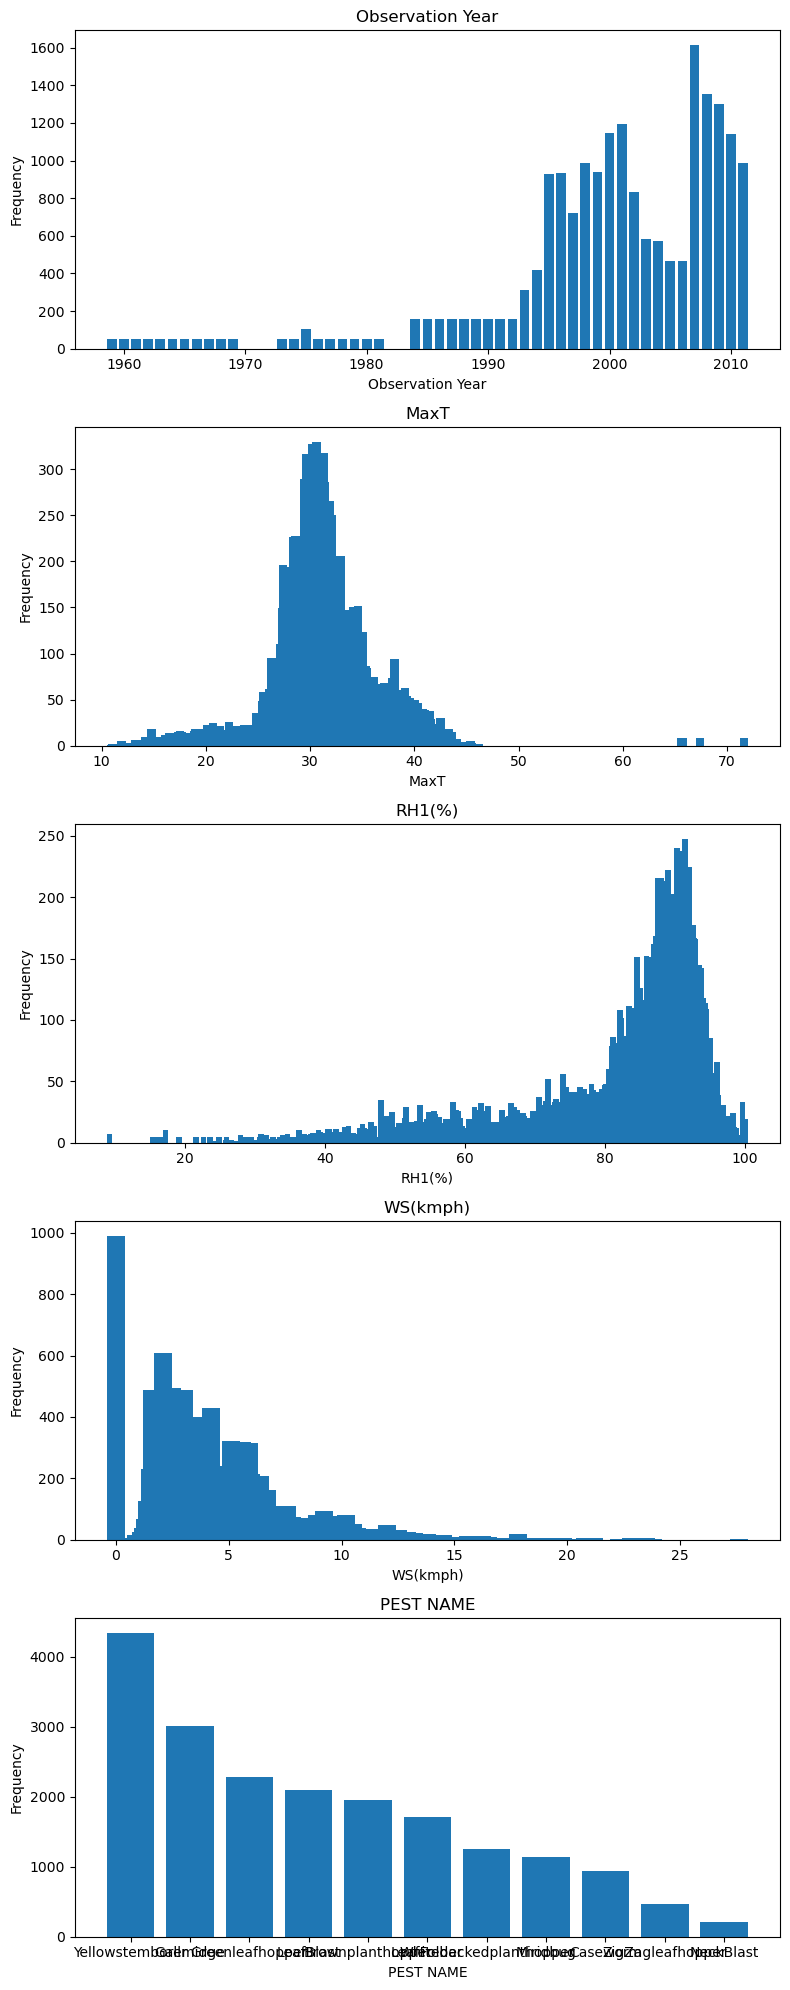

In [18]:
# Select the columns for bar plots
columns = ['Observation Year', 'MaxT', 'RH1(%)', 'WS(kmph)', 'PEST NAME']

# Create subplots for bar plots
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Create bar plots for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the bar graph
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### Pie Charts

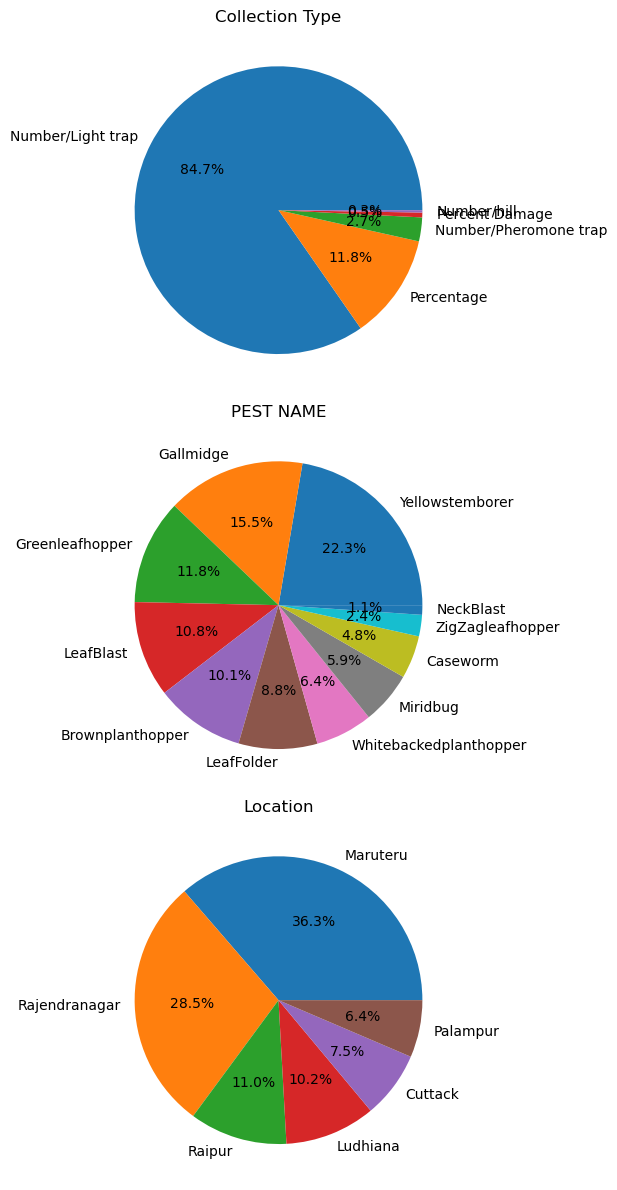

In [19]:
# Select the columns for pie charts
columns = ['Collection Type', 'PEST NAME', 'Location']

# Create subplots for pie charts (stacked vertically)
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Ensure axs is iterable for single subplot case
if len(columns) == 1:
    axs = [axs]

# Create pie charts for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the pie chart
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 4. Data Preprocessing

## 4.1 Creating The Target Attribute
The "Outbreak" attribute is used as the target attribute for the Machine Learning Models for the "pest outbreak prediction", which is a typical Decision Support System (DSS). It is  created with the following logic:

"If the 'Pest Value' is anything above '0', it is seen as an outbreak."

In [20]:
data['Outbreak'] = (data['Pest Value'] > 0).astype(int)
data.head()

Observation Year  Standard Week  Pest Value Collection Type  MaxT  MinT  \
0              2003              1         0.0     Number/hill  27.9  14.8   
1              2003              2         0.0     Number/hill  27.2  15.0   
2              2003              3         0.0     Number/hill  28.7  18.3   
3              2003              4         0.0     Number/hill  25.3  16.4   
4              2003              5         0.0     Number/hill  28.8  18.7   

   RH1(%)  RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME  \
0    94.7    51.3     0.0       3.1       8.7      2.7  Brownplanthopper   
1    93.9    53.1     0.0       2.1       8.7      2.4  Brownplanthopper   
2    94.1    56.7     0.6       4.8       6.7      2.8  Brownplanthopper   
3    90.9    57.4     0.3       6.5       5.3      3.0  Brownplanthopper   
4    95.7    55.0     0.0       5.2       6.3      2.8  Brownplanthopper   

  Location  Outbreak  
0  Cuttack         0  
1  Cuttack         0  
2  Cuttack         0  
3  Cuttack         0  
4  Cuttack         0

### Total Outbreak Percentage 

In [21]:
print(data['Outbreak'].value_counts())
print('')
count_ones = data['Outbreak'].sum()
total = data['Outbreak'].count()
pct = count_ones / total * 100
print(f"Outbreak == 1: {count_ones}/{total} ({pct:.2f}%)")

Outbreak
1    10734
0     8670
Name: count, dtype: int64

Outbreak == 1: 10734/19404 (55.32%)


This represents a balanced dataset. Allowing the model to be trained equally with records that contain an outbreak and records that don't.

### Removing The 'Pest Value' Attribute

The 'Pest Value' attribute was used to create the target attribute called 'Outbreak', therefore it is no longer needed. Now it will be removed from the dataset.

In [22]:
data.drop(columns=['Pest Value'], inplace=True)
data.head()

Observation Year  Standard Week Collection Type  MaxT  MinT  RH1(%)  \
0              2003              1     Number/hill  27.9  14.8    94.7   
1              2003              2     Number/hill  27.2  15.0    93.9   
2              2003              3     Number/hill  28.7  18.3    94.1   
3              2003              4     Number/hill  25.3  16.4    90.9   
4              2003              5     Number/hill  28.8  18.7    95.7   

   RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME Location  \
0    51.3     0.0       3.1       8.7      2.7  Brownplanthopper  Cuttack   
1    53.1     0.0       2.1       8.7      2.4  Brownplanthopper  Cuttack   
2    56.7     0.6       4.8       6.7      2.8  Brownplanthopper  Cuttack   
3    57.4     0.3       6.5       5.3      3.0  Brownplanthopper  Cuttack   
4    55.0     0.0       5.2       6.3      2.8  Brownplanthopper  Cuttack   

   Outbreak  
0         0  
1         0  
2         0  
3         0  
4         0

### Empty Values

This is to check if there are any empty values in the dataset. This shows that all of the columns and records are populated.

In [23]:
data.isnull().sum()

Observation Year    0
Standard Week       0
Collection Type     0
MaxT                0
MinT                0
RH1(%)              0
RH2(%)              0
RF(mm)              0
WS(kmph)            0
SSH(hrs)            0
EVP(mm)             0
PEST NAME           0
Location            0
Outbreak            0
dtype: int64

## 4.2 Duplicate Records

This is to check if there are any duplicate records found in the dataset. They are then removed. This dataset doesn't contain any duplicates.

In [24]:
print(data.duplicated().value_counts())
data = data.drop_duplicates()

False    19404
Name: count, dtype: int64


## 4.3 Handling Outliers

### Boxplot Graphs For All The Numerical Attributes

In [25]:
# Plot / Visualize the outliers of the numerical features
for col in data[['MaxT', 'MinT', 'RH1(%)', 'RH2(%)', 'RF(mm)', 'WS(kmph)', 'SSH(hrs)', 'EVP(mm)']]:
    fig = px.box(
        data_frame=data, 
        x=col,
        orientation='h',
        title=f'Boxplot of the Target ({col}) - With Outliers'
    )
    fig.show()

### Removing Outliers From The Attribute "MaxT"

In [26]:
# Create a mask to filter out the outliers for 'MaxT'
mask_MaxT = (data['MaxT'] >= 23.3) & (data['MaxT'] <= 38.7)

fig = px.box(
    data_frame=data[mask_MaxT], 
    x='MaxT', 
    orientation='h',
    title='Boxplot of the Target (MaxT) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "MinT"

In [27]:
# Create a mask to filter out the outliers for 'MinT'
mask_MinT = (data['MinT'] >= 8.8)

fig = px.box(
    data_frame=data[mask_MinT], 
    x='MinT', 
    orientation='h',
    title='Boxplot of the Target (MinT) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "RH1(%)"

In [28]:
# Create a mask to filter out the outliers for 'RH1(%)'
mask_RH1 = (data['RH1(%)'] >= 75.3)

fig = px.box(
    data_frame=data[mask_RH1], 
    x='RH1(%)', 
    orientation='h',
    title='Boxplot of the Target (RH1%) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "RH2(%)"

There is no outliers for the attribute "RH2(%)

In [29]:
fig = px.box(
    data_frame=data, 
    x='RH2(%)', 
    orientation='h',
    title='Boxplot of the Target (RH2%)')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "RF(mm)"

The attribute "RG(mm)" is not able to filter out the outliers.

In [30]:
fig = px.box(
    data_frame=data, 
    x='RF(mm)', 
    orientation='h',
    title='Boxplot of the Target (RF(mm))')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "WS(kmph)"

In [31]:
# Create a mask to filter out the outliers for 'WS(kmph)'
mask_WS = (data['WS(kmph)'] <= 10.2)

fig = px.box(
    data_frame=data[mask_WS], 
    x='WS(kmph)', 
    orientation='h',
    title='Boxplot of the Target (WS(kmph)) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "SSH(hrs)"

In [32]:
# Create a mask to filter out the outliers for 'SSH(hrs)'
mask_SSH = (data['SSH(hrs)'] <= 14)

fig = px.box(
    data_frame=data[mask_SSH], 
    x='SSH(hrs)', 
    orientation='h',
    title='Boxplot of the Target (SSH(hrs)) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing Outliers From The Attribute "EVP(mm)"

In [33]:
# Create a mask to filter out the outliers for 'EVP(mm)'
mask_EVP = (data['EVP(mm)'] <= 8)

fig = px.box(
    data_frame=data[mask_EVP], 
    x='EVP(mm)', 
    orientation='h',
    title='Boxplot of the Target (EVP(mm)) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Removing all of the outliers from the dataset

In [ ]:
# data = data[mask_MaxT & mask_MinT & mask_RH1 & mask_WS & mask_SSH & mask_EVP]
## The outliers

## 4.4 Encode Categorical Variables

Use One-Hot encoding for 'PEST NAME', 'Location', and 'Collection Type'.

In [35]:
# 1. Define categorical and numeric columns
cat_cols = ['Collection Type', 'PEST NAME', 'Location']
num_cols = [c for c in data.columns if c not in cat_cols + ['Outbreak']]

# 2. One-hot encode categorical features
data = pd.get_dummies(data, columns=cat_cols, drop_first=False)

## 4.5 Splitting The Data

The data needs to be split into the training set and the testing set. 80% of the dataset will be assigned to the training set and 20% will be assigned to the training set. The sets are assigned randomly to ensure integrity.

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Outbreak'], inplace=False)
y = data['Outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Baseline Comparison

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, class_weight=None)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression classification report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       882
           1       0.78      0.85      0.81      1605

    accuracy                           0.75      2487
   macro avg       0.73      0.71      0.71      2487
weighted avg       0.74      0.75      0.74      2487

Logistic Regression ROC AUC: 0.7967780674055707


C:\Users\hroux\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# 6. Random Forest & Gradient Boosting Models

## 6.1 Random Forest Model

A Random Forest Model is trained using the training set from above.

### Model Training And Evaluation

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       882
           1       0.86      0.92      0.89      1605

    accuracy                           0.85      2487
   macro avg       0.85      0.83      0.84      2487
weighted avg       0.85      0.85      0.85      2487

Random Forest ROC AUC: 0.9205554495941679


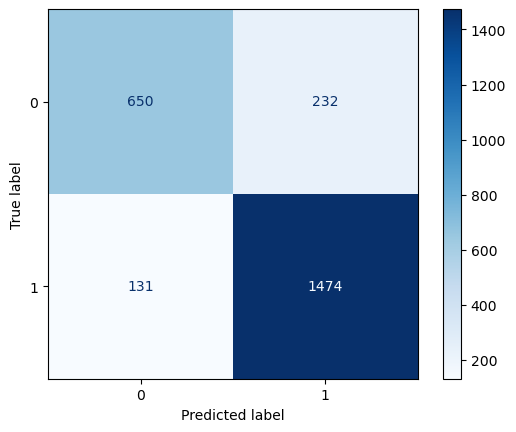

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # or 'balanced' if you use a stricter Outbreak threshold
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest classification report:")
print(classification_report(y_test, y_pred))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")


### Precision-Recall Curve

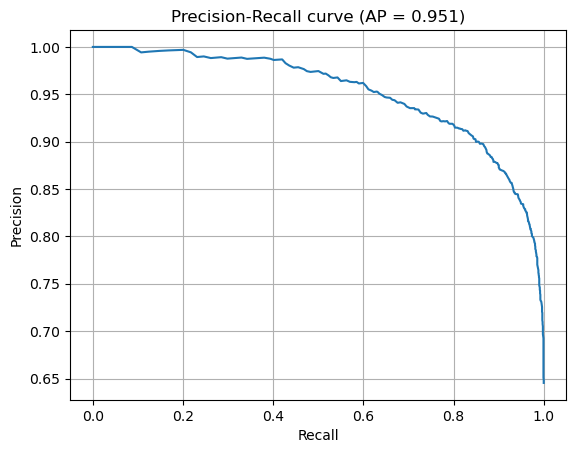

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()

### Cross-Validation

In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_auc = cross_val_score(
    rf_clf,
    X, y,
    cv=skf,
    scoring="roc_auc"
)
print("Random Forest 5-fold mean ROC AUC:", rf_cv_auc.mean())

Random Forest 5-fold mean ROC AUC: 0.9284618686358836


### Feature Importance

#### Group Feature Importance

In [41]:
# Get importances as a Series
rf_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)

# Define groups
weather_cols = [
    "Observation Year", "Standard Week",
    "MaxT", "MinT", "RH1(%)", "RH2(%)",
    "RF(mm)", "WS(kmph)", "SSH(hrs)", "EVP(mm)"
]
location_cols = [c for c in X_train.columns if c.startswith("Location_")]
pest_cols = [c for c in X_train.columns if c.startswith("PEST NAME_")]
ctype_cols = [c for c in X_train.columns if c.startswith("Collection Type_")]

group_importance = {
    "Weather/Time": rf_importances[weather_cols].sum(),
    "Location (all dummies)": rf_importances[location_cols].sum(),
    "Pest (all dummies)": rf_importances[pest_cols].sum(),
    "Collection Type (all dummies)": rf_importances[ctype_cols].sum(),
}

group_importance = pd.Series(group_importance).sort_values(ascending=False)
print(group_importance)

Weather/Time                     0.684406
Pest (all dummies)               0.184232
Location (all dummies)           0.106916
Collection Type (all dummies)    0.024446
dtype: float64


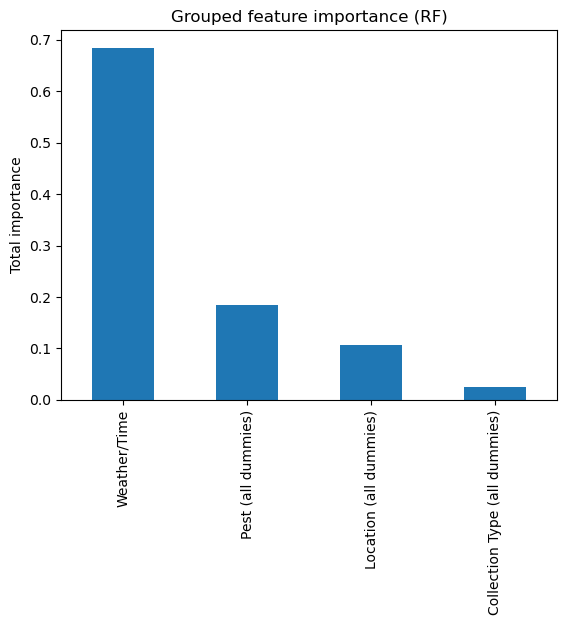

In [42]:
import matplotlib.pyplot as plt

group_importance.plot(kind="bar")
plt.ylabel("Total importance")
plt.title("Grouped feature importance (RF)")
plt.show()

#### Individual Feature Importance

In [43]:
# Get importances as a Series
rf_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)

# Define groups
location_cols = [c for c in X_train.columns if c.startswith("Location_")]
pest_cols = [c for c in X_train.columns if c.startswith("PEST NAME_")]
ctype_cols = [c for c in X_train.columns if c.startswith("Collection Type_")]

group_importance = {
    # "Weather/Time": rf_importances[weather_cols].sum(),
    "Location (all dummies)": rf_importances[location_cols].sum(),
    "Pest (all dummies)": rf_importances[pest_cols].sum(),
    "Collection Type (all dummies)": rf_importances[ctype_cols].sum(),
    "Observation Year": rf_importances["Observation Year"].sum(),
    "Standard Week": rf_importances["Standard Week"].sum(),
    "MaxT": rf_importances["MaxT"].sum(),
    "MinT": rf_importances["MinT"].sum(),
    "RH1(%)": rf_importances["RH1(%)"].sum(),
    "RH2(%)": rf_importances["RH2(%)"].sum(),
    "RF(mm)": rf_importances["RF(mm)"].sum(),
    "WS(kmph)": rf_importances["WS(kmph)"].sum(),
    "SSH(hrs)": rf_importances["SSH(hrs)"].sum(),
    "EVP(mm)": rf_importances["EVP(mm)"].sum(),
}

group_importance = pd.Series(group_importance).sort_values(ascending=False)
print(group_importance)

Pest (all dummies)               0.184232
Location (all dummies)           0.106916
MinT                             0.104436
Standard Week                    0.101751
Observation Year                 0.080893
RH2(%)                           0.077312
MaxT                             0.061391
WS(kmph)                         0.055902
SSH(hrs)                         0.055252
RH1(%)                           0.054766
EVP(mm)                          0.052290
RF(mm)                           0.040413
Collection Type (all dummies)    0.024446
dtype: float64


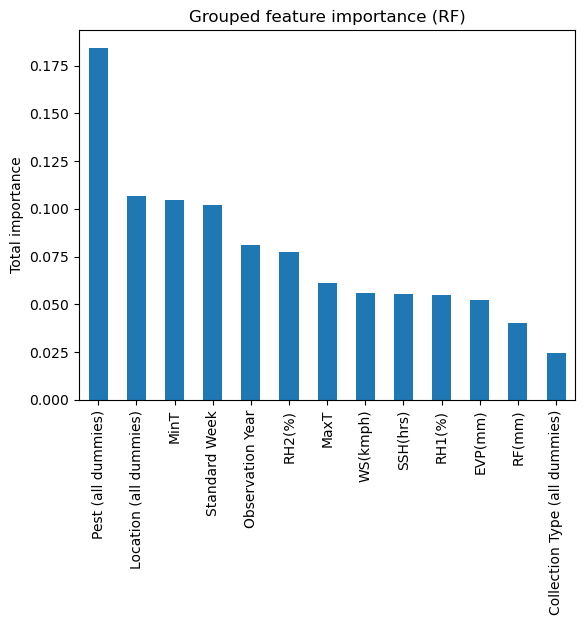

In [44]:
import matplotlib.pyplot as plt

group_importance.plot(kind="bar")
plt.ylabel("Total importance")
plt.title("Grouped feature importance (RF)")
plt.show()

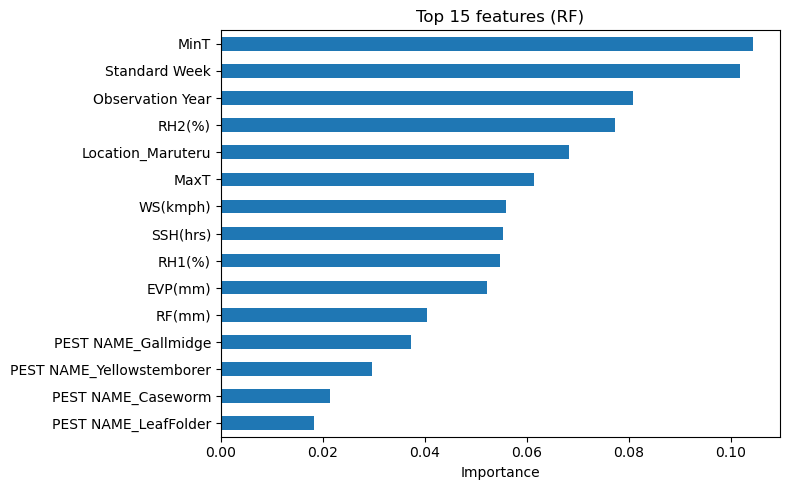

In [45]:
top_n = 15
top_importances = rf_importances.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(8, 5))
top_importances[::-1].plot(kind="barh")  # reverse for horizontal plot
plt.xlabel("Importance")
plt.title(f"Top {top_n} features (RF)")
plt.tight_layout()
plt.show()

## 6.2 Gradient Boosting Model

A Gradient Boosting Model is trained using the training set from above.

### Model Training And Evaluation

XGBoost classification report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       882
           1       0.87      0.93      0.90      1605

    accuracy                           0.86      2487
   macro avg       0.86      0.84      0.85      2487
weighted avg       0.86      0.86      0.86      2487

XGBoost ROC AUC: 0.9257719287091783


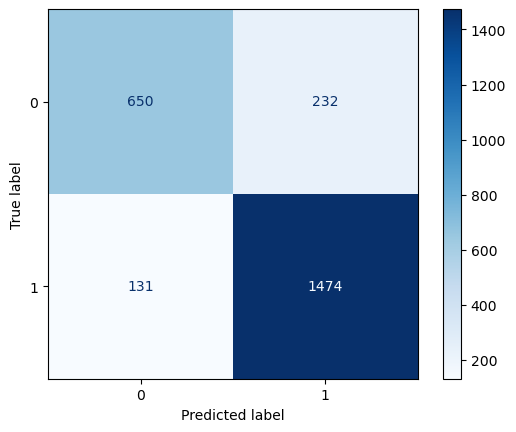

In [46]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'  # suppresses warning
    # scale_pos_weight can be tuned if classes become imbalanced
)

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("XGBoost classification report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

### Precision-Recall Curve

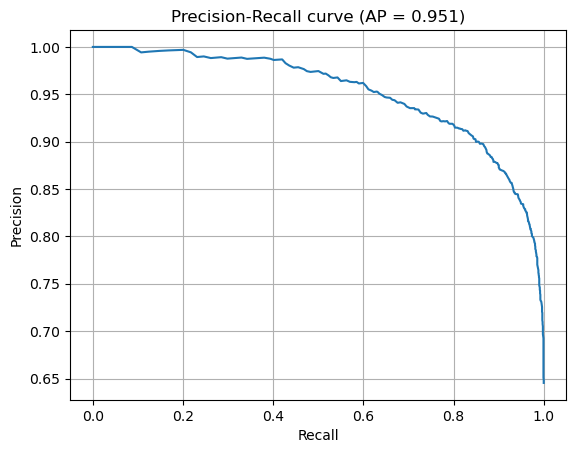

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()

### Cross-Validation

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_auc = cross_val_score(
    xgb_clf,
    X, y,
    cv=skf,
    scoring="roc_auc"
)
print("Gradient Boosting 5-fold mean ROC AUC:", rf_cv_auc.mean())

Gradient Boosting 5-fold mean ROC AUC: 0.9320092128462674


## 6.3 Making Predictions With The Models

This is to use the trained models on new raw records. When you want to predict for new raw rows (with original columns).

In [49]:
# 1. Example new raw records (same columns as original data before encoding)
df_new_raw = pd.DataFrame([
    {
        "Observation Year": 2010,
        "Standard Week": 30,
        "Pest Value": 50.0,                  # this will be dropped, same as when preparing training data
        "Collection Type": "Number/Light trap",
        "MaxT": 32.5,
        "MinT": 24.0,
        "RH1(%)": 90.0,
        "RH2(%)": 60.0,
        "RF(mm)": 25.0,
        "WS(kmph)": 4.0,
        "SSH(hrs)": 7.0,
        "EVP(mm)": 4.5,
        "PEST NAME": "Brownplanthopper",
        "Location": "Cuttack"
    },
    {
        "Observation Year": 2005,
        "Standard Week": 10,
        "Pest Value": 0.0,
        "Collection Type": "Number/Light trap",
        "MaxT": 28.0,
        "MinT": 18.0,
        "RH1(%)": 80.0,
        "RH2(%)": 45.0,
        "RF(mm)": 0.0,
        "WS(kmph)": 3.0,
        "SSH(hrs)": 8.5,
        "EVP(mm)": 3.0,
        "PEST NAME": "Yellowstemborer",
        "Location": "Maruteru"
    },
    {
        "Observation Year": 2008,
        "Standard Week": 38,
        "Pest Value": 200.0,
        "Collection Type": "Number/Light trap",
        "MaxT": 33.0,
        "MinT": 23.0,
        "RH1(%)": 92.0,
        "RH2(%)": 65.0,
        "RF(mm)": 40.0,
        "WS(kmph)": 6.0,
        "SSH(hrs)": 5.5,
        "EVP(mm)": 5.0,
        "PEST NAME": "LeafBlast",
        "Location": "Rajendranagar"
    }
])

# 2. Drop the "Pest Value" attribute
df_new_raw = df_new_raw.drop(columns=["Pest Value"])

# 3. Function from previous answer, adjusted to use global cat_cols
cat_cols = ['Collection Type', 'PEST NAME', 'Location']  # must match training
trained_feature_cols = X_train.columns                   # from the training step

def prepare_new_records(df_raw, trained_columns, cat_cols):
    # One-hot encode categorical as in training
    df_encoded = pd.get_dummies(df_raw, columns=cat_cols, drop_first=False)

    # Add missing dummy columns
    for col in trained_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Drop extra columns not used in training
    df_encoded = df_encoded[trained_columns]

    return df_encoded

# 4. Prepare new data
X_new = prepare_new_records(df_new_raw, trained_feature_cols, cat_cols)

# 5. Predict with trained models
# Random Forest predictions
rf_preds_new = rf_clf.predict(X_new)
rf_probs_new = rf_clf.predict_proba(X_new)[:, 1]

print("New raw records:")
print(df_new_raw)
print("\nRandom Forest predicted Outbreak (0/1):", rf_preds_new)
print("Random Forest predicted probability of Outbreak:", rf_probs_new)

print("\n")

# XGBoost predictions
xgb_preds_new = xgb_clf.predict(X_new)
xgb_probs_new = xgb_clf.predict_proba(X_new)[:, 1]

print("XGBoost predicted Outbreak (0/1):", xgb_preds_new)
print("XGBoost predicted probability of Outbreak:", xgb_probs_new)


New raw records:
   Observation Year  Standard Week    Collection Type  MaxT  MinT  RH1(%)  \
0              2010             30  Number/Light trap  32.5  24.0    90.0   
1              2005             10  Number/Light trap  28.0  18.0    80.0   
2              2008             38  Number/Light trap  33.0  23.0    92.0   

   RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME  \
0    60.0    25.0       4.0       7.0      4.5  Brownplanthopper   
1    45.0     0.0       3.0       8.5      3.0   Yellowstemborer   
2    65.0    40.0       6.0       5.5      5.0         LeafBlast   

        Location  
0        Cuttack  
1       Maruteru  
2  Rajendranagar  

Random Forest predicted Outbreak (0/1): [1 1 1]
Random Forest predicted probability of Outbreak: [0.52333333 0.92       0.82333333]


XGBoost predicted Outbreak (0/1): [0 1 1]
XGBoost predicted probability of Outbreak: [0.26084578 0.97662383 0.93052506]


## 6.4 Multi-Location Testing

In [52]:
data = pd.read_csv('RICE.csv')
data['Outbreak'] = (data['Pest Value'] > 0).astype(int)
locations = data["Location"].unique()

for loc in locations:
    mask_test = (data["Location"] == loc)
    X_train_loc = X[~mask_test]
    y_train_loc = y[~mask_test]
    X_test_loc = X[mask_test]
    y_test_loc = y[mask_test]

    # instantiate with valid parameters (match the RandomForest used earlier)
    rf_clf_loc = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
    rf_clf_loc.fit(X_train_loc, y_train_loc)

    y_prob_loc = rf_clf_loc.predict_proba(X_test_loc)[:, 1]
    print(loc, "ROC AUC:", roc_auc_score(y_test_loc, y_prob_loc))


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Cuttack ROC AUC: 0.7963184142415252


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Ludhiana ROC AUC: 0.6933863001152137


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Maruteru ROC AUC: 0.5860910872986491


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Palampur ROC AUC: 0.792664892043774


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Raipur ROC AUC: 0.7826413743736579


C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\hroux\AppData\Local\Temp\ipykernel_42676\1280798850.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Rajendranagar ROC AUC: 0.7348020223282383


# 7. Long Short-Term Memory Model

The LSTM Model will be trained on one pest and one location. The following code focuses on Yellowstemborer in Rajendranagar. The pest (Yellowstemborer) was chosen, seeing as it is the pest with the most amount of records. The location (Rajendranagar) was chosen, because it was the location with the most amount of records for this pest.

# 7.1 Choose Features And Sort

In [ ]:
data = pd.read_csv('RICE.csv')
data['Outbreak'] = (data['Pest Value'] > 0).astype(int)

# Start from your cleaned 'data' where Pest Value is dropped and Outbreak is defined
# data columns: Observation Year, Standard Week, Collection Type, MaxT, ..., PEST NAME, Location, Outbreak

# 1. Filter to one pest and one location (simplest case)
pest = "Yellowstemborer"
loc = "Rajendranagar"

df = data[(data["PEST NAME"] == pest) & (data["Location"] == loc)].copy()
print(df.head())
print(df.info())

# 2. Sort by time
df = df.sort_values(by=["Observation Year", "Standard Week"]).reset_index(drop=True)

# 3. (Optional) Drop columns you don't want as inputs
# For a first LSTM, you might use only numeric weather + week + year as inputs
input_cols = [
    "Observation Year",
    "Standard Week",
    "MaxT",
    "MinT",
    "RH1(%)",
    "RH2(%)",
    "RF(mm)",
    "WS(kmph)",
    "SSH(hrs)",
    "EVP(mm)",
]
target_col = "Outbreak"

df_model = df[input_cols + [target_col]].copy()

## 7.2 Scale numeric features

Use MinMax or standard scaling. Here is MinMax to using scikit‑learn. Save "scaler" for later to transform any future data identically.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_model_scaled = df_model.copy()
df_model_scaled[input_cols] = scaler.fit_transform(df_model[input_cols])
df_model_scaled.head()

## 7.3 Build supervised sequences (sliding windows)

Define a helper to turn a univariate time series with features into sequences of length T predicting the next week’s Outbreak.

In [ ]:
def make_sequences(df_scaled, input_cols, target_col, window_size=4):
    """
    df_scaled: DataFrame with scaled inputs and target
    Returns X (num_samples, window_size, num_features), y (num_samples,)
    """
    X_list, y_list = [], []
    values = df_scaled[input_cols + [target_col]].values
    n_total = len(values)

    for i in range(n_total - window_size):
        window = values[i : i + window_size]
        target = values[i + window_size, -1]  # Outbreak after the window
        X_list.append(window[:, :-1])        # all input features over the window
        y_list.append(target)

    X = np.array(X_list)
    y = np.array(y_list).astype(int)
    return X, y

window_size = 4  # e.g., use 4 weeks history
X, y = make_sequences(df_model_scaled, input_cols, target_col, window_size=window_size)

print("X shape:", X.shape)  # (samples, time_steps=window_size, features=len(input_cols))
print("y shape:", y.shape)


## 7.4 Train/test split for sequences

Use a chronological split to respect time ordering (no shuffling).

In [ ]:
# Simple temporal split: first 80% for train, last 20% for test
n_samples = X.shape[0]
split_index = int(n_samples * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

## 7.5 Define and train an LSTM model

Example with Keras (TensorFlow backend):

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(64, input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))  # binary classification

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=False  # keep temporal order
)

## 7.6 Evaluate the LSTM

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("LSTM classification report:")
print(classification_report(y_test, y_pred))
print("LSTM ROC AUC:", roc_auc_score(y_test, y_prob))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

## 7.7 Precision_Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {ap:.3f})")
plt.grid(True)
plt.show()